In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def f(x):
    return 1+0.2 * x**2

In [3]:
def m1(x,a,b):
    return a+ b* x 
    


In [4]:
def varianceBias(model,nexp,ndata,nparams, trueModel):
    allcoeffs = np.empty((nexp,nparams))
    for i in range(nexp):
        data = np.random.random(size=ndata)
        y = f(data) + 0.1 * np.random.normal(size=ndata)
        res,_ = curve_fit(model, data, y, p0=[1]+[0]*(nparams-1))
        allcoeffs[i] = res
    ws = np.average(allcoeffs,axis=0)
    variance = np.std(allcoeffs,axis=0)

    bias = (np.array(trueModel) - ws) **2
    #same as wostd**2
    #variance = np.average( (allcoeffs - [w0,w1])**2,axis=0)
    total = np.average((allcoeffs - trueModel)**2, axis=0)
    
    #print ("bias: ", bias)
    #print ("variance", variance**2)
    #print ("total", total)
    #print (variance**2+bias)
    return variance**2,bias,total

In [5]:
vs=[]
bs=[]
vsabs=[]
bsabs=[]

nexps = [5,6,7,8,9,10,15,20,30,40,50,60,100,200]
for ndata in nexps:
    v,b,t = varianceBias(m1,nexp = 1000, ndata = ndata, nparams = 2, trueModel=[1,0])
    vs.append(v/t)
    bs.append(b/t)
    vsabs.append(v)
    bsabs.append(b)

Text(0.5,0,'data sample size')

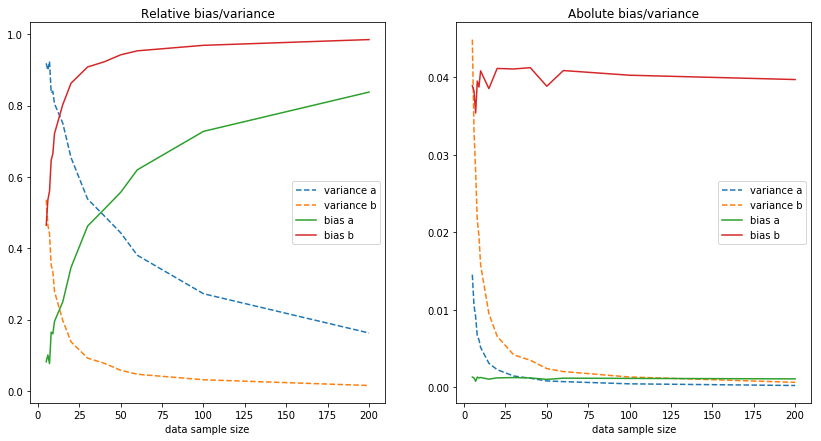

In [6]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.plot(nexps,[vv[0] for vv in vs],'--', label='variance a')
plt.plot(nexps,[vv[1] for vv in vs],'--', label='variance b')
plt.plot(nexps,[bb[0] for bb in bs],'-', label='bias a')
plt.plot(nexps,[bb[1] for bb in bs],'-', label='bias b')
plt.title("Relative bias/variance")
plt.legend()
plt.xlabel("data sample size")

plt.subplot(122)
plt.plot(nexps,[vv[0] for vv in vsabs],'--', label='variance a')
plt.plot(nexps,[vv[1] for vv in vsabs],'--', label='variance b')
plt.plot(nexps,[bb[0] for bb in bsabs],'-', label='bias a')
plt.plot(nexps,[bb[1] for bb in bsabs],'-', label='bias b')
plt.title("Abolute bias/variance")
plt.legend()
plt.xlabel("data sample size")

In [7]:
def m2(x,a,b,c):
    return a +x*(b + x* (c))

varianceBias(m2,nexp = 1000, ndata = ndata, nparams = 3, trueModel=[1,0,0.2])

(array([0.0004598 , 0.01020525, 0.00961415]),
 array([6.77331751e-09, 2.81639772e-07, 6.01831096e-08]),
 array([0.00045981, 0.01020553, 0.00961421]))

In [8]:
vs=[]
bs=[]
nexps = [5,10,20,30,40,50,60,100]
for ndata in nexps:
    v,b,t = varianceBias(m2,nexp = 1000, ndata = ndata, nparams = 3, trueModel=[1,0,0.2])
    vs.append(v/t)
    bs.append(b/t)

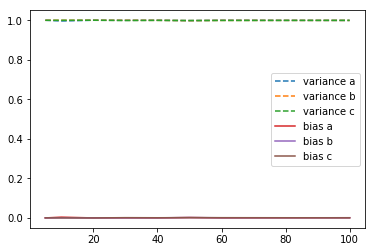

In [9]:
plt.plot(nexps,[vv[0] for vv in vs],'--', label='variance a')
plt.plot(nexps,[vv[1] for vv in vs],'--', label='variance b')
plt.plot(nexps,[vv[2] for vv in vs],'--', label='variance c')
plt.plot(nexps,[bb[0] for bb in bs],'-', label='bias a')
plt.plot(nexps,[bb[1] for bb in bs],'-', label='bias b')
plt.plot(nexps,[bb[2] for bb in bs],'-', label='bias c')

plt.legend()

In [10]:
def m3(x,a,b,c,d):
    return a +x*(b + x* (c+d*x))

varianceBias(m3,nexp = 1000, ndata = ndata, nparams = 4, trueModel=[1,0,0.2,0])

(array([0.00174159, 0.13159166, 0.72181052, 0.31394326]),
 array([9.00437535e-06, 2.28142017e-04, 3.06818144e-04, 1.95571703e-05]),
 array([0.00175059, 0.13181981, 0.72211734, 0.31396282]))

Text(0.5,0,'data sample size')

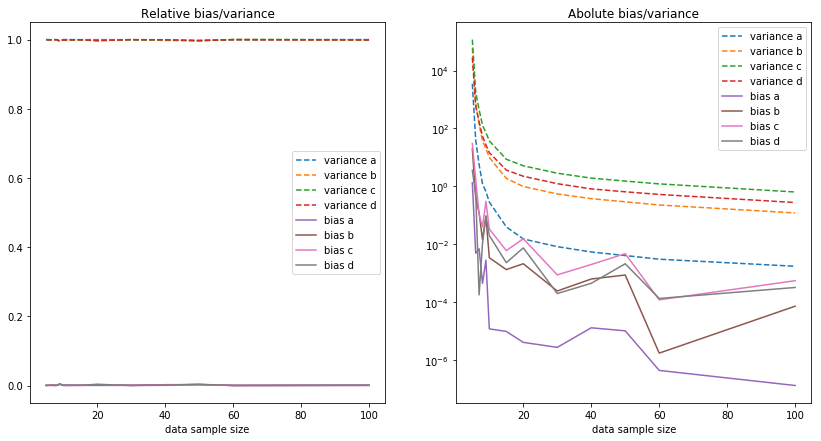

In [11]:
vs=[]
bs=[]
vsabs=[]
bsabs=[]
nexps = [5,6,7,8,9,10,15,20,30,40,50,60,100]
for ndata in nexps:
    v,b,t = varianceBias(m3,nexp = 1000, ndata = ndata, nparams = 4, trueModel=[1,0,0.2,0])
    vs.append(v/t)
    bs.append(b/t)
    vsabs.append(v)
    bsabs.append(b)
    
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.plot(nexps,[vv[0] for vv in vs],'--', label='variance a')
plt.plot(nexps,[vv[1] for vv in vs],'--', label='variance b')
plt.plot(nexps,[vv[2] for vv in vs],'--', label='variance c')
plt.plot(nexps,[vv[3] for vv in vs],'--', label='variance d')
plt.plot(nexps,[bb[0] for bb in bs],'-', label='bias a')
plt.plot(nexps,[bb[1] for bb in bs],'-', label='bias b')
plt.plot(nexps,[bb[2] for bb in bs],'-', label='bias c')
plt.plot(nexps,[bb[3] for bb in bs],'-', label='bias d')
plt.title("Relative bias/variance")
plt.legend()
plt.xlabel("data sample size")

plt.subplot(122)
plt.plot(nexps,[vv[0] for vv in vsabs],'--', label='variance a')
plt.plot(nexps,[vv[1] for vv in vsabs],'--', label='variance b')
plt.plot(nexps,[vv[2] for vv in vsabs],'--', label='variance c')
plt.plot(nexps,[vv[3] for vv in vsabs],'--', label='variance d')
plt.plot(nexps,[bb[0] for bb in bsabs],'-', label='bias a')
plt.plot(nexps,[bb[1] for bb in bsabs],'-', label='bias b')
plt.plot(nexps,[bb[2] for bb in bsabs],'-', label='bias c')
plt.plot(nexps,[bb[3] for bb in bsabs],'-', label='bias d')
plt.title("Abolute bias/variance")
plt.yscale('log')
plt.legend()
plt.xlabel("data sample size")
